In [18]:
# Redondear a dos decimales el valor promedio
import pandas as pd
GRD_sheet=pd.read_excel('Datos.xls', sheet_name='GRD', header=0, index_col=None)
print(np.round(GRD_sheet['Costo resolución en Clínica Privada [MM$]'].mean(),2))
print(np.round(GRD_sheet['Costo resolución en Clínica Privada [MM$]'].mean(),1))
print(np.round(GRD_sheet['Costo resolución en Clínica Privada [MM$]'].mean(),0))

5.49
5.5
5.0


In [14]:
# Para redondear los datos de una columna completa 
GRD_sheet['Costo resolución en Clínica Privada [MM$]']=GRD_sheet['Costo resolución en Clínica Privada [MM$]'].round(2)
GRD_sheet.head()

,ID GRD,Nombre GRD,Costo resolución en Clínica Privada [MM$]
0,GRD1,Coronario,7.92
1,GRD2,Hepático,3.42
2,GRD3,Respiratorio,2.92
3,GRD4,Renal,6.19
4,GRD5,Neurológico,6.78


In [21]:
# Utilizando el archivo “Datos.xls”, un Dataframe y comandos en Python, 
# ¿cuál de las siguientes alternativas corresponde al costo total de instalar
# el máximo de camas críticas posibles en toda la región?
# Respuesta correcta 240.509?
Hosp_sheet=pd.read_excel('Datos.xls', sheet_name='Hospitales', header=0, index_col=None)
Hosp_sheet[['Nombre Servicio de Salud', 'Total Camas Críticas', 'Costo de instalar una cama [MM$]']].groupby('Nombre Servicio de Salud').max()

,Total Camas Críticas,Costo de instalar una cama [MM$]
Nombre Servicio de Salud,,
Metropolitano Central,44,1368
Metropolitano Norte,44,1407
Metropolitano Occidente,76,1433
Metropolitano Oriente,46,1422
Metropolitano Sur,74,1319
Metropolitano Sur Oriente,55,1203


In [28]:
resultado = np.sum(np.multiply(Hosp_sheet['Total Camas Críticas'],Hosp_sheet['Costo de instalar una cama [MM$]']))
print(resultado)

863581


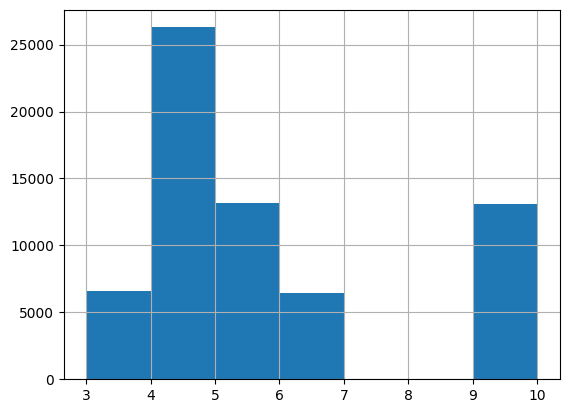

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
Info_sheet=pd.read_excel('Datos.xls', sheet_name='Información Histórica', header=0, index_col=None)
Estadia = Info_sheet['Estadia'].hist(bins=7)
plt.show()

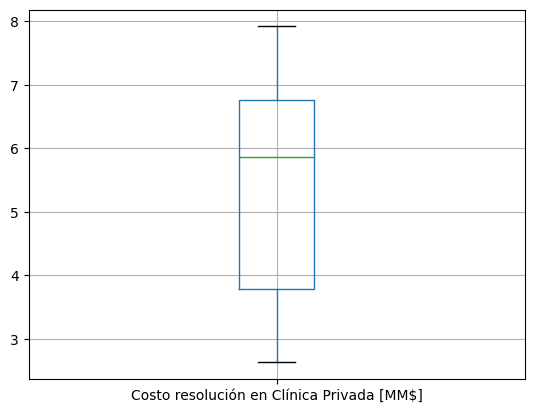

In [16]:
GRD_sheet=pd.read_excel('Datos.xls', sheet_name='GRD', header=0, index_col=None)
hist=GRD_sheet.boxplot()
plt.show()

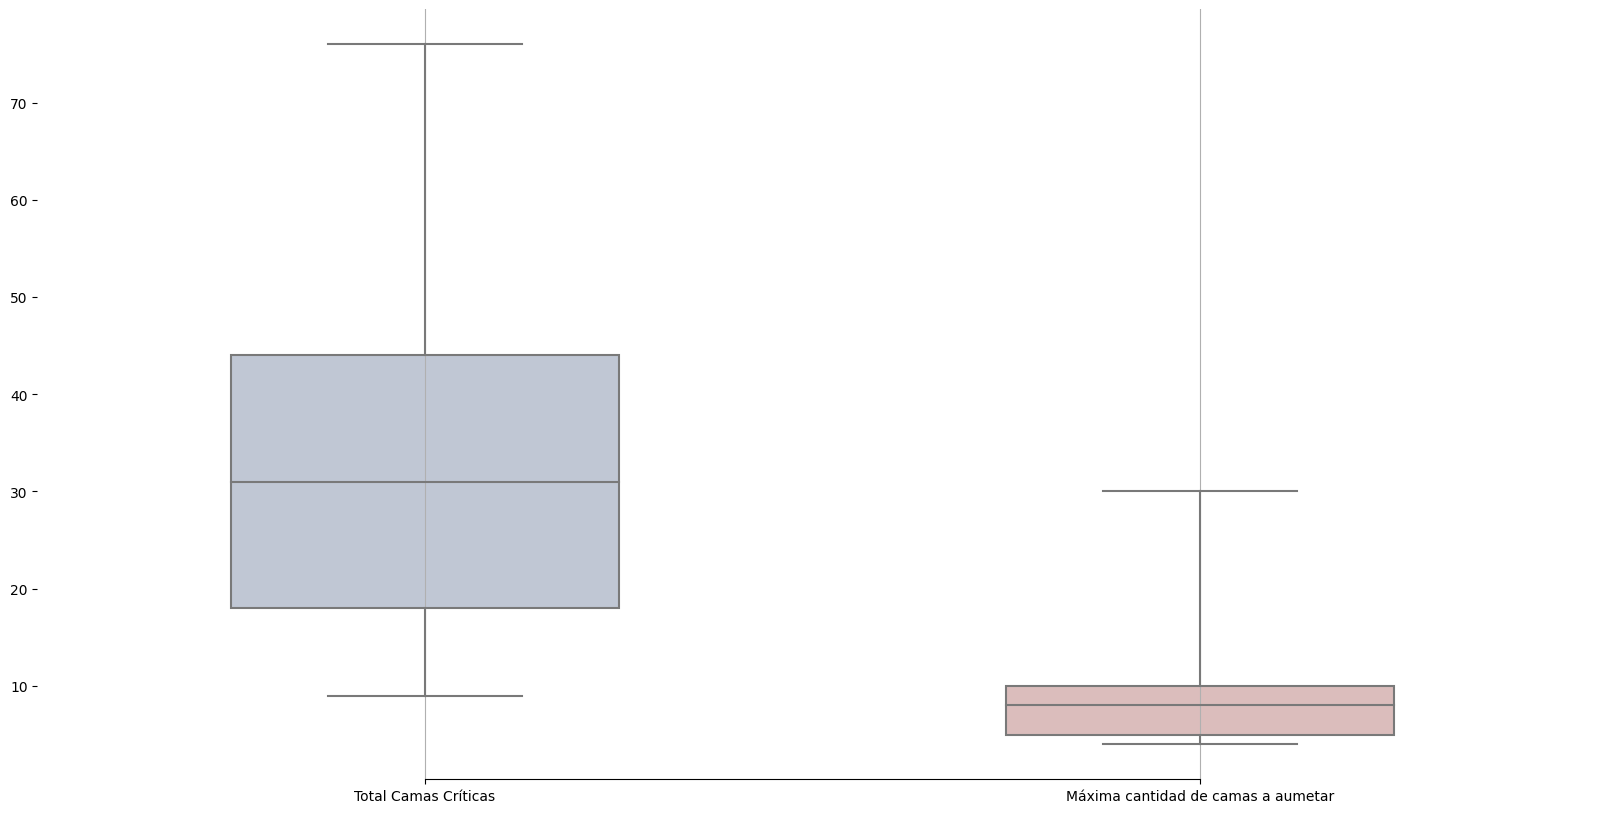

In [24]:
import seaborn as sns
Hosp_sheet=pd.read_excel('Datos.xls', sheet_name='Hospitales', header=0, index_col=None)
f,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=Hosp_sheet[['Nombre Establecimiento','Total Camas Críticas','Máxima cantidad de camas a aumetar']],whis=[0,100], width=0.5, palette='vlag')
ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)

In [32]:
# Actividad
# Utilizando el archivo 'Datos.xls' construya un Dataframe que indique la cantidad de camas críticas existentes en cada 
# servicio de salud, es decir, la cantidad de camas que tiene el hospital con mayor capacidad.
# Luego, guarde esta información en un archivo Excel llamado 'MaxCamasCCxSS.xlsx'

Hosp_sheet=pd.read_excel('Datos.xls', sheet_name='Hospitales', header=0, index_col=None)
camas=Hosp_sheet[['Nombre Servicio de Salud', 'Total Camas Críticas']]
apoyo=camas.groupby('Nombre Servicio de Salud').max()
apoyo.to_excel('MaxCamasCCxSS.xlsx')
apoyo


,Total Camas Críticas
Nombre Servicio de Salud,
Metropolitano Central,44
Metropolitano Norte,44
Metropolitano Occidente,76
Metropolitano Oriente,46
Metropolitano Sur,74
Metropolitano Sur Oriente,55


In [37]:
# Utilizando el archivo 'Datos.xls' construya un gráfico de una tabla de 
# frecuencias de la cantidad de pacientes que llegan diariamente al sistema de salud
Info_sheet=pd.read_excel('Datos.xls', sheet_name='Información Histórica', header=0, index_col=None)
Info_sheet['Número de pacientes']=Info_sheet['Día de llegada']
pacientes=Info_sheet[['Día de llegada','Número de pacientes']]
pregunta2=pacientes.groupby('Día de llegada').count()
pregunta2.head()

,Número de pacientes
Día de llegada,
1,146
2,142
3,152
4,156
5,152


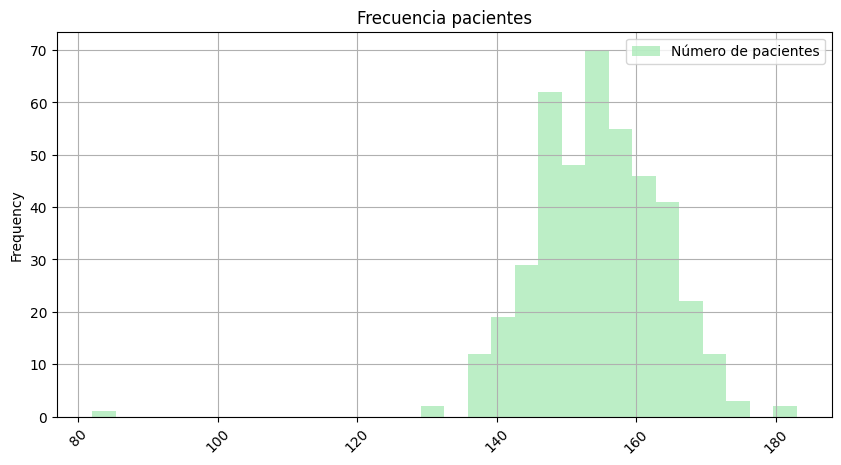

In [39]:
pregunta2.plot(kind='hist',
               alpha=0.7,
               bins=30,
               title='Frecuencia pacientes',
               rot=45,
               grid=True,
               figsize=(10,5),
               color=['#A0E8AF','#FFCF56'])
plt.show()

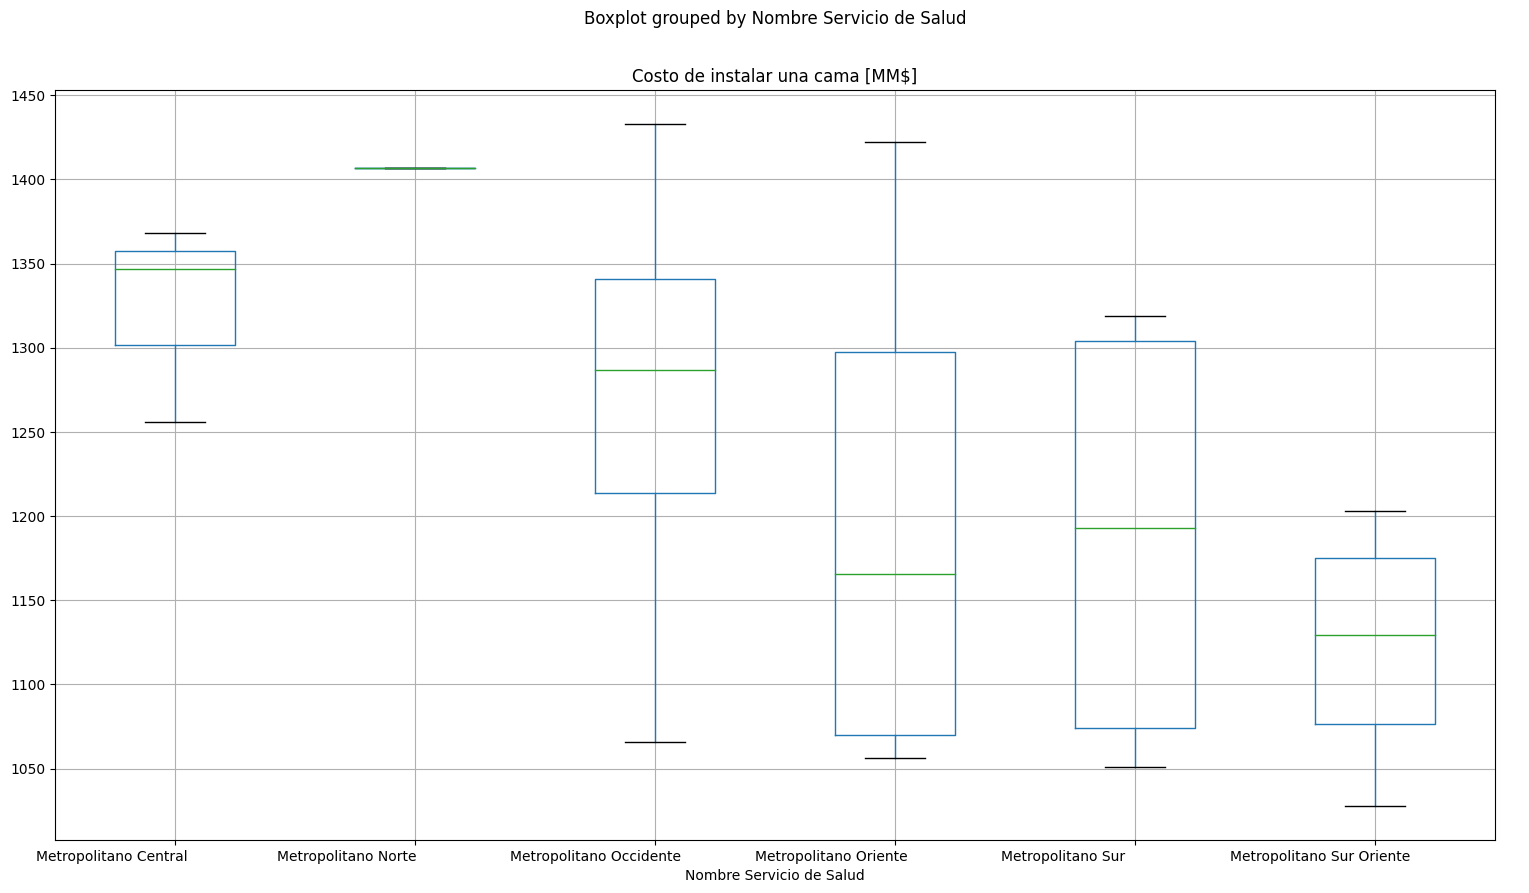

In [46]:
# Utilizando el archivo 'Datos.xlx' construya un Boxplot que indique el costo promedio de 
# instalar una cama crítica en cada servicio de salud
pregunta3=Hosp_sheet.boxplot(column=['Costo de instalar una cama [MM$]'], by='Nombre Servicio de Salud', figsize=(18,10))